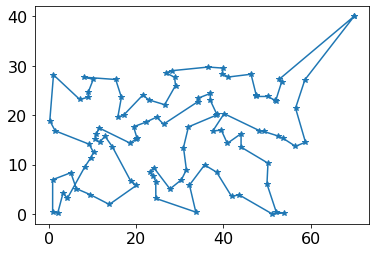

In [4]:
from numpy import loadtxt, radians, sin, cos, inf, exp
from numpy import array, r_, c_, arange, savetxt
from numpy.lib.scimath import arccos
from numpy.random import shuffle, randint, rand
from matplotlib.pyplot import plot, show, rc

a = loadtxt("Pdata17_1.txt")
x = a[:,::2].flatten()
y = a[:,1::2].flatten()

#初始点
d1 = array([[70, 40]])
#路线矩阵
xy = c_[x, y]
xy = r_[d1, xy, d1]

N = xy.shape[0]
t = radians(xy)
#print(t)
d = array([[6370 * arccos(cos(t[i,0] - t[j,0]) * cos(t[i,1]) * cos(t[j,1]) +
            sin(t[i,1]) * sin(t[j,1])) for i in range(N)] 
            for j in range(N)]).real
#把数据保存到文本文件，供下面使用
savetxt('Pdata17_2.txt', c_[xy, d])

path = arange(N)
L = inf
for j in range(1000):
    path0 = arange(1, N-1)
    shuffle(path0)
    path0 = r_[0, path0, N-1]
    L0 = d[0, path0[1]]
    for i in range(1, N-1):
        L0 += d[path0[i], path0[i+1]]
    if L0 < L:
        path = path0
        L =L0
print(path, '\n', L)

e = 0.1 ** 30
M = 20000
at = 0.999
T = 1

for k in range(M):
    c = randint(1, 101, 2)
    c.sort()
    c1 = c[0]
    c2 = c[1]
    df = d[path[c1-1], path[c2]] + d[path[c1], path[c2+1]] \
         - d[path[c1-1], path[c1]] - d[path[c2], path[c2+1]]
    if df < 0:
        path = r_[path[0], path[1:c1], path[c2:c1-1:-1], path[c2+1:102]]
        L = L + df
    else:
        if exp(-df/T) > rand(1):
            path = r_[path[0], path[1:c1], path[c2:c1-1:-1], path[c2+1:102]]
            L = L + df
    T = T * at
    if T < e:
        break
        
#输出巡航路径及路径长度
print(path, '\n', L)
xx = xy[path, 0]
yy = xy[path, 1]
rc('font', size = 16)
#画巡航路径
plot(xx, yy, '-*')
show()
            



[  0  63  78  17  85  56  69 100  36   4  83  70  19  18   3   1  46  92
   6  45  96  65  43  27  32  71  79  66  61  86  33  84  97  15  75  22
  37  74  31  11  52  10  39  40  58  48  20  38  62  95  68  93  28   9
  29  49  87  47  76  14   5  30  98  25  13  90  57  67  82  16  91  51
  53  54  60  24  64  34  89  55  23  80  42   7  41  72  99  59   8  12
  26  35   2  50  81  21  94  44  73  77  88 101] 
 226145.10078944417
[  0  61   5  38  66  68  78  31  74  63   1  64  14  73  62  53  88  94
  16  98  91  28  44  24  86  83  49   2  33  32  65  54   4  36  51  37
  71  99  57  60  58   9  13  95  11  15  80  17  52  41   7  26  87  45
  89  22  42  79  93  67  21  81  20  27  85  40  25  50   8  82  23  90
   6  39  48  56  30  10  97  59  43  47  69  75  72  55  84  18  12  35
  29  46  70  96  19  77  92 100   3  76  34 101] 
 44503.785680602545


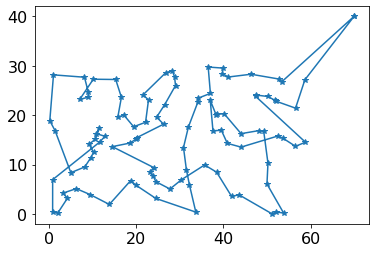

In [5]:
#程序文件Pex17_1.py
from numpy import loadtxt,radians,sin,cos,inf,exp
from numpy import array,r_,c_,arange,savetxt
from numpy.lib.scimath import arccos
from numpy.random import shuffle,randint,rand
from matplotlib.pyplot import plot, show, rc
a=loadtxt("Pdata17_1.txt")
x=a[:,::2]. flatten(); y=a[:,1::2]. flatten()
d1=array([[70,40]]); xy=c_[x,y]
xy=r_[d1,xy,d1]; N=xy.shape[0]
t=radians(xy)  #转化为弧度
d=array([[6370*arccos(cos(t[i,0]-t[j,0])*cos(t[i,1])*cos(t[j,1])+
  sin(t[i,1])*sin(t[j,1])) for i in range(N)]
       for j in range(N)]).real
savetxt('Pdata17_2.txt',c_[xy,d])  #把数据保存到文本文件，供下面使用
path=arange(N); L=inf
for j in range(1000):
    path0=arange(1,N-1); shuffle(path0)
    path0=r_[0,path0,N-1]; L0=d[0,path0[1]]  #初始化
    for i in range(1,N-1):L0+=d[path0[i],path0[i+1]]
    if L0<L: path=path0; L=L0
print(path,'\n',L)        
e=0.1**30; M=20000; at=0.999; T=1
for k in range(M):
    c=randint(1,101,2); c.sort()
    c1=c[0]; c2=c[1]
    df=d[path[c1-1],path[c2]]+d[path[c1],path[c2+1]]-\
    d[path[c1-1],path[c1]]-d[path[c2],path[c2+1]]  #续行
    if df<0:
        path=r_[path[0],path[1:c1],path[c2:c1-1:-1],path[c2+1:102]]; L=L+df
    else:
        if exp(-df/T)>=rand(1):
            path=r_[path[0],path[1:c1],path[c2:c1-1:-1],path[c2+1:102]]
            L=L+df
    T=T*at
    if T<e: break
print(path,'\n',L)  #输出巡航路径及路径长度
xx=xy[path,0]; yy=xy[path,1]; rc('font',size=16)
plot(xx,yy,'-*'); show()  #画巡航路径
